# Flight Price Prediction

**Problem Statement:**

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records
    
FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket    

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
train_data = pd.read_excel(r"Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
#checking the dimension of dataset
train_data.shape

(10683, 11)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


The Features contains two types of data that is object and integer data types.

In [5]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can see null values in Route and Total_Stops. Let's handle it.

In [7]:
# Drop Null values Because there is a only 2 Null Values
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

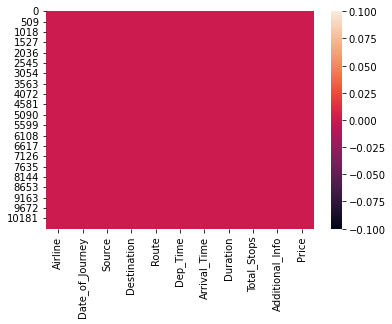

In [9]:
# Let's visualize the null values clearly
sns.heatmap(train_data.isnull())

In [10]:
train_data.shape

(10682, 11)

Null values are removed from the dataset.

Let's work on the date time features

In [11]:
train_data["Journey_Day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

train_data["Journey_Month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
# dropping Date_of_Journey column

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [14]:
# Similar to Date_of_Journey we can extract values from Dep_Time/Arrival_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# dropping Dep_Time
train_data.drop(["Dep_Time"], axis = 1, inplace = True)


# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# dropping Arrival_Time
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [16]:
# PreProcessing of Duration Columns and Derive New Two Columns (Duration_Hours,Duration_Min)
train_data['Duration'].unique()

# Function for impute duration values like 0h or 0m
def impute_Duration(duration):
    x = duration.split()
    
    if len(x) != 2:
        if 'h' in x[0]:
            return x[0] + ' 0m'
        else:
            return '0h ' + x[0]
        
    else:
        return duration

# Call Function
train_data['Duration'] = train_data['Duration'].apply(impute_Duration)

In [17]:
# Make New Two Columns of Duration
train_data['Duration_Hour'] = train_data['Duration'].apply(lambda x:int(x.split('h')[0]))
train_data['Duration_Minute'] = train_data['Duration'].apply(lambda x:x.split('m')[0].split()[1])

train_data.drop(["Duration"], axis = 1, inplace = True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [19]:
# Checking the value counts of each columns
for i in train_data.columns:
        print(train_data[i].value_counts())
        print('****************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
****************************************
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU

We can observe some repeated categories in some features, let's replace them

In [20]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
train_data["Airline"] = train_data["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
train_data["Airline"] = train_data["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
train_data["Airline"] = train_data["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
train_data["Destination"] = train_data["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
train_data["Additional_Info"] = train_data["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
train_data["Additional_Info"] = train_data["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [21]:
# Checking the value counts again
for i in train_data.columns:
        print(train_data[i].value_counts())
        print('****************************************')

Jet Airways          3855
IndiGo               2053
Air India            1751
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64
****************************************
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
****************************************
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64
************

In [22]:
# Route and Total_Stops are related to each other, so dropping the Route feature

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [23]:
# Here Values are assigned with corresponding keys
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


# EDA:

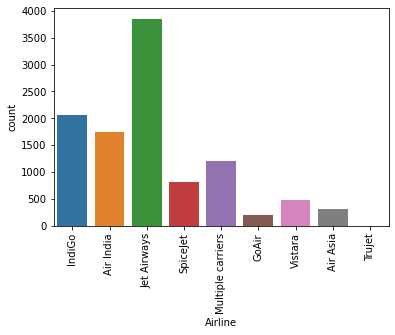

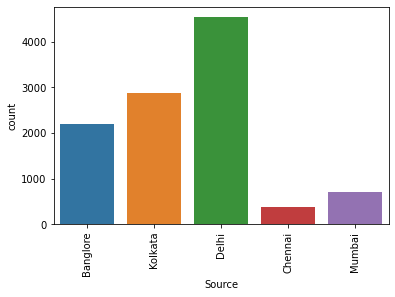

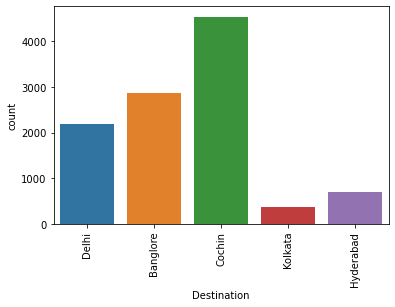

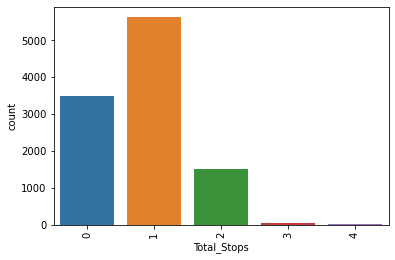

In [25]:
cate=['Airline', 'Source', 'Destination', 'Total_Stops']

for k in cate:
    sns.countplot(x=k,data=train_data)
    plt.xticks(rotation=90)
    plt.show()

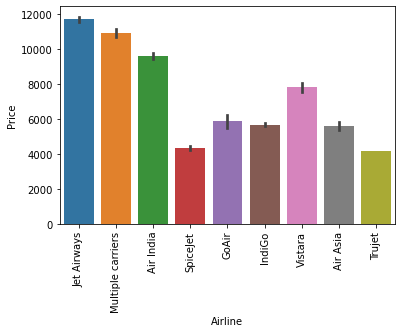

In [26]:
# Average Prices of Every Airlines
sns.barplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.show()

We can see price of Jet Airways is higher than others followed by Multiple carriers and Air India.

<AxesSubplot:xlabel='Source', ylabel='Price'>

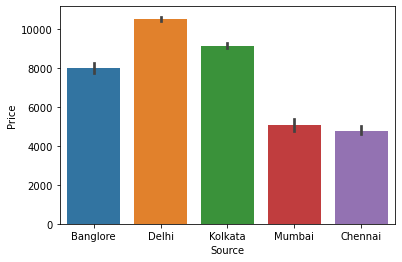

In [27]:
# Average Price from Avery Source
sns.barplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

We can see price is higher for Delhi,Kolkata and Bangalore.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

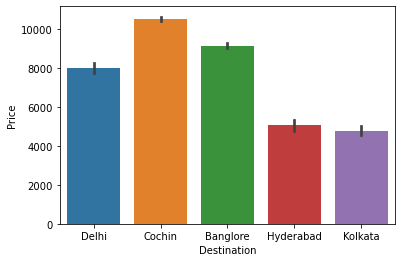

In [28]:
# We can make Visualization With Avg. Price for Destination
sns.barplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

Price of  Delhi, Cochin and Banglore is very high compared to others.

<AxesSubplot:xlabel='Price', ylabel='Duration_Hour'>

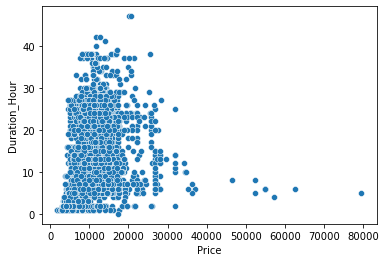

In [29]:
# Let's check if Our Duration Hour is increasing with Price 
sns.scatterplot(data=train_data,x='Price',y='Duration_Hour')

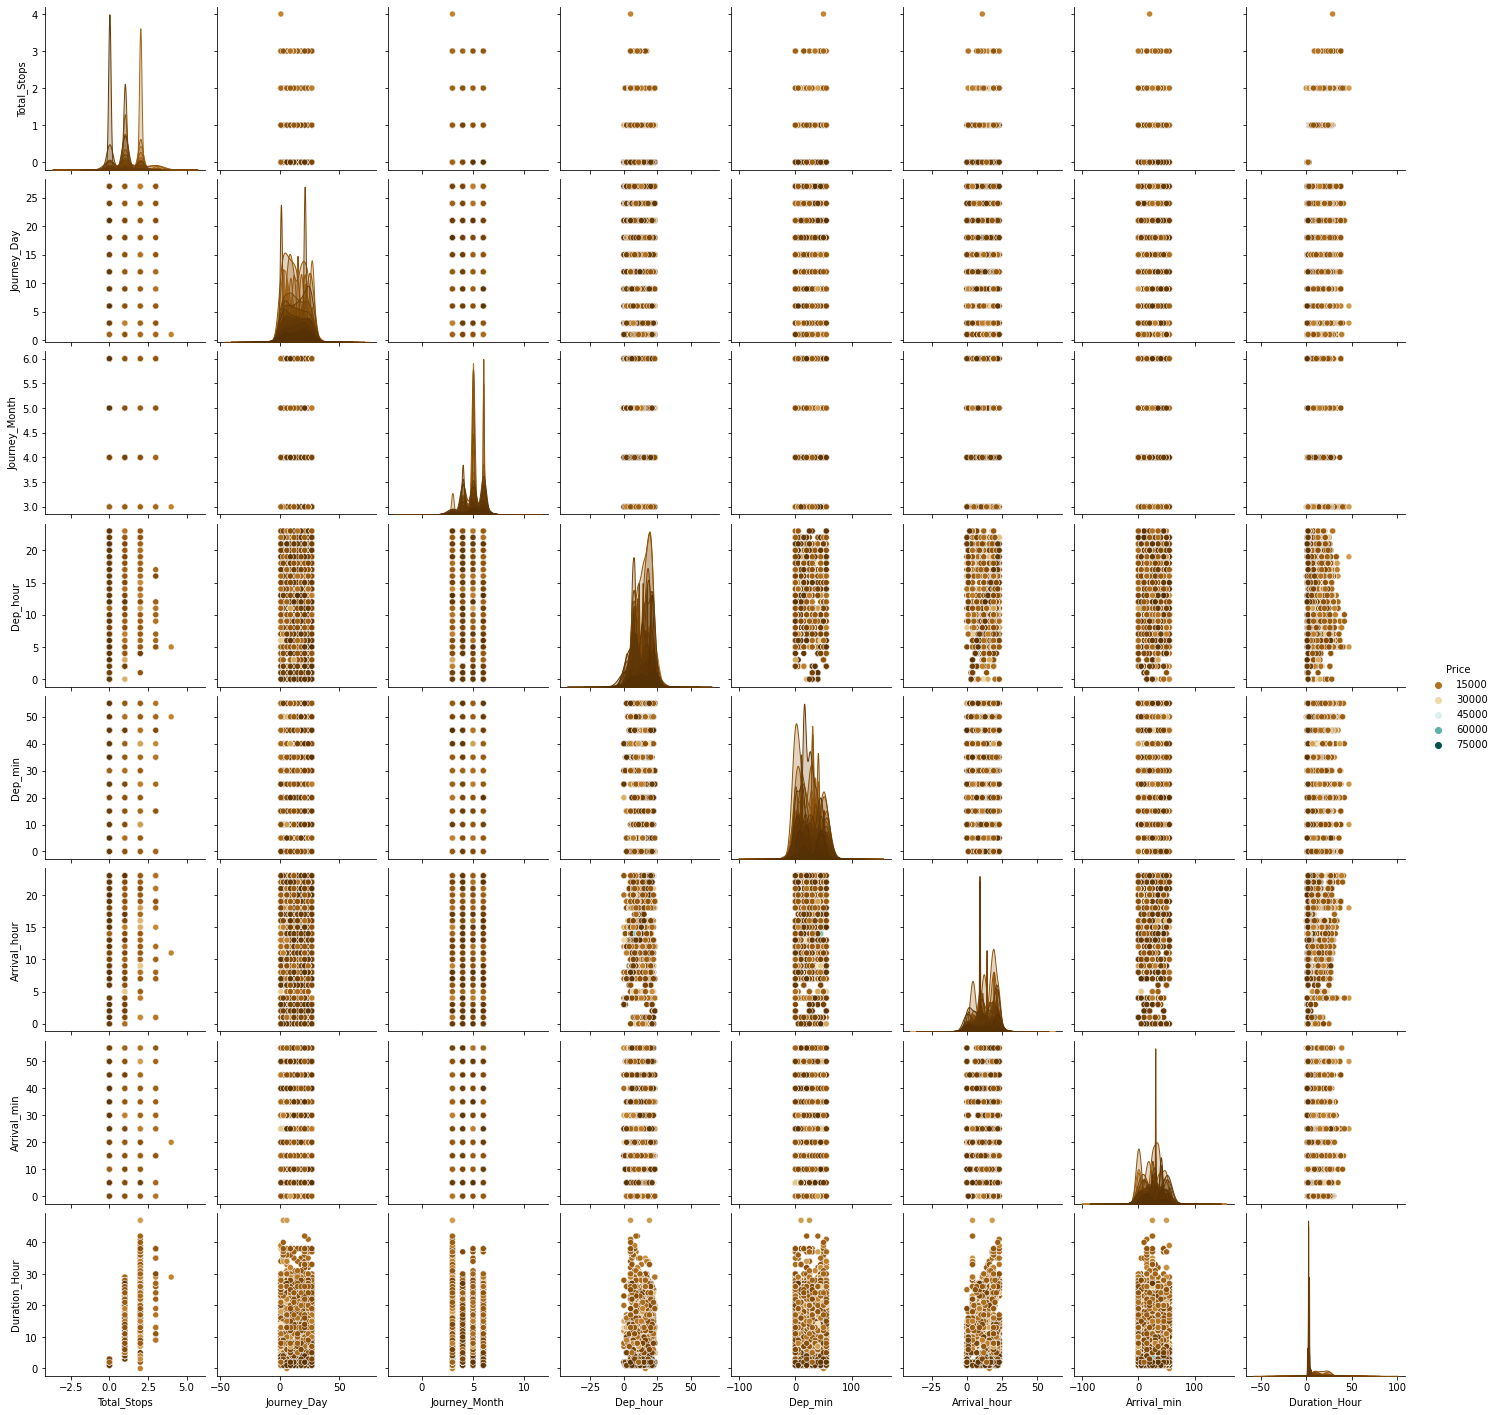

In [30]:
sns.pairplot(train_data,hue="Price",palette="BrBG")
plt.show()

# Outliers:

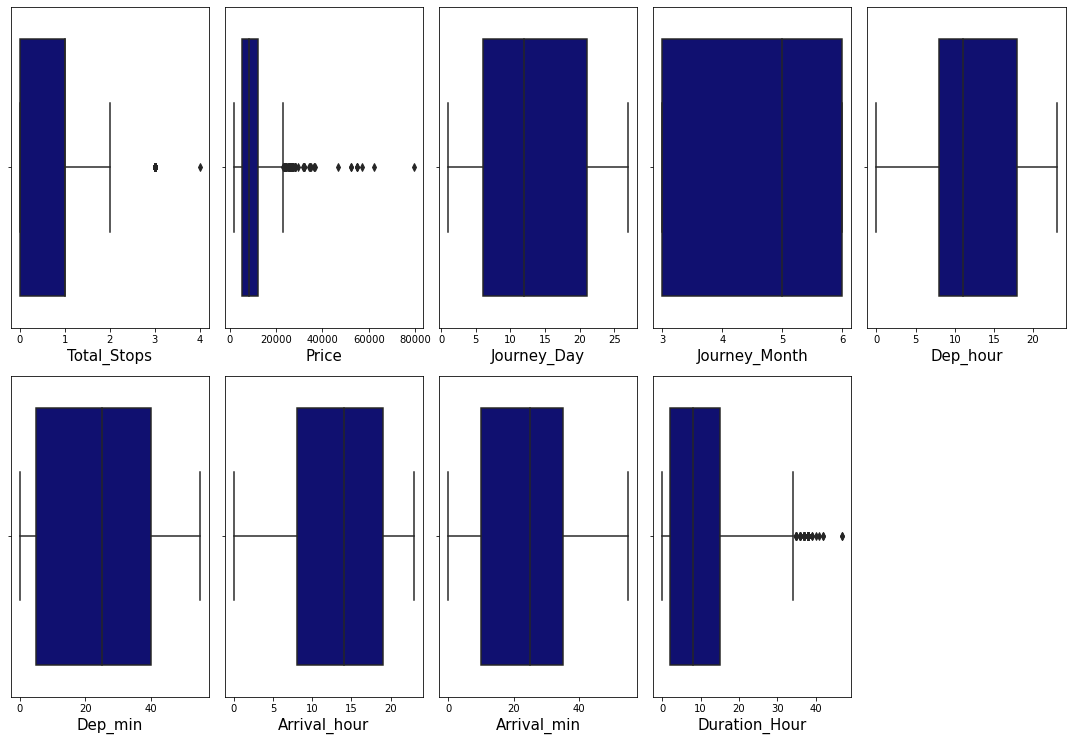

In [31]:
# Identifying the outliers using boxplot
numerical_col=[]
for i in train_data.dtypes.index:
    if train_data.dtypes[i]!='object':
        numerical_col.append(i)

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.boxplot(train_data[column],color="navy")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can notice outliers in Duration_hours, let's remove outliers using Zscore method.

In [32]:
# Feature containing outliers
feature = train_data[['Duration_Hour']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature))

z

,Duration_Hour
0,0.970614
1,0.381999
2,1.030677
3,0.617445
4,0.735168
...,...
10678,0.970614
10679,0.970614
10680,0.852891
10681,0.970614


In [33]:
# Creating new dataframe
new_train_data = train_data[(z<3).all(axis=1)] 
new_train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,0,12648,1,3,11,30,14,10,2,40


In [34]:
# Shape of original dataset
train_data.shape

(10682, 13)

In [35]:
# Shape of new dataframe
new_train_data.shape

(10616, 13)

# Percentage Data Loss:

In [36]:
# Checking the Percentage data loss
data_loss = (train_data.shape[0]-new_train_data.shape[0])/train_data.shape[0]*100
data_loss

0.6178618236285339

# Encoder:

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_train_data['Airline']=le.fit_transform(new_train_data['Airline'])
new_train_data['Source']=le.fit_transform(new_train_data['Source'])
new_train_data['Destination']=le.fit_transform(new_train_data['Destination'])
new_train_data['Total_Stops']=le.fit_transform(new_train_data['Total_Stops'])

# Correlation:

In [41]:
corr=new_train_data.corr()
corr

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hour
Airline,1.000000,-0.013637,0.055373,-0.163616,0.024728,0.022283,0.031202,-0.028326,-0.070200,-0.005955,-0.087471,-0.107607
Source,-0.013637,1.000000,-0.434676,0.195825,0.016719,0.004088,0.184172,0.059473,-0.055936,0.026147,0.021640,0.172467
Destination,0.055373,-0.434676,1.000000,-0.422567,-0.263341,0.004034,-0.152608,-0.088822,0.097075,-0.058201,0.006954,-0.391849
Total_Stops,-0.163616,0.195825,-0.422567,1.000000,0.606068,-0.009635,0.063897,-0.047483,-0.000266,0.028802,-0.108162,0.733448
Price,0.024728,0.016719,-0.263341,0.606068,1.000000,-0.151998,-0.099088,0.011411,-0.025551,0.021087,-0.088909,0.513048
Journey_Day,0.022283,0.004088,0.004034,-0.009635,-0.151998,1.000000,-0.039223,0.002120,-0.008536,-0.002809,-0.017706,-0.021845
Journey_Month,0.031202,0.184172,-0.152608,0.063897,-0.099088,-0.039223,1.000000,0.034190,-0.058905,-0.000248,-0.098613,0.034160
Dep_hour,-0.028326,0.059473,-0.088822,-0.047483,0.011411,0.002120,0.034190,1.000000,-0.026015,0.010931,0.068352,0.027156
Dep_min,-0.070200,-0.055936,0.097075,-0.000266,-0.025551,-0.008536,-0.058905,-0.026015,1.000000,0.043681,-0.018696,-0.020197
Arrival_hour,-0.005955,0.026147,-0.058201,0.028802,0.021087,-0.002809,-0.000248,0.010931,0.043681,1.000000,-0.155332,0.041541


<AxesSubplot:>

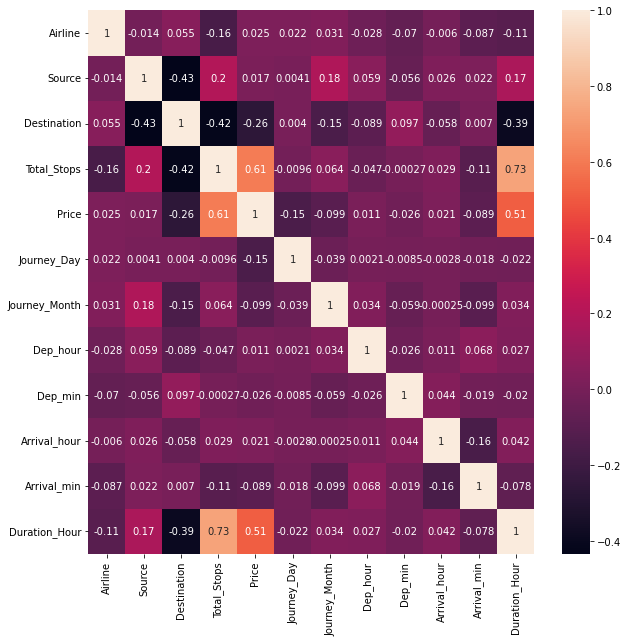

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

We can see that Total Stops is highly positively correlated with Prices, whereas Destination is negatively correlated.

Total Stops and Duration is highly positively correlated.

Destination is highly negatively correlated with Total Stops,Duration Hour and Source.

# Skewness:

In [43]:
new_train_data.describe()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hour
count,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000
mean,3.617935,1.952336,1.174830,0.815656,9066.739921,13.511586,4.714488,12.532310,24.424925,13.316409,24.685852,10.072155
std,1.787863,1.179743,1.015449,0.667829,4609.771258,8.474875,1.161788,5.740461,18.767020,6.862626,16.517244,8.231545
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,5228.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000
50%,4.000000,2.000000,1.000000,1.000000,8366.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000
75%,4.000000,3.000000,2.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000
max,8.000000,4.000000,4.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,35.000000


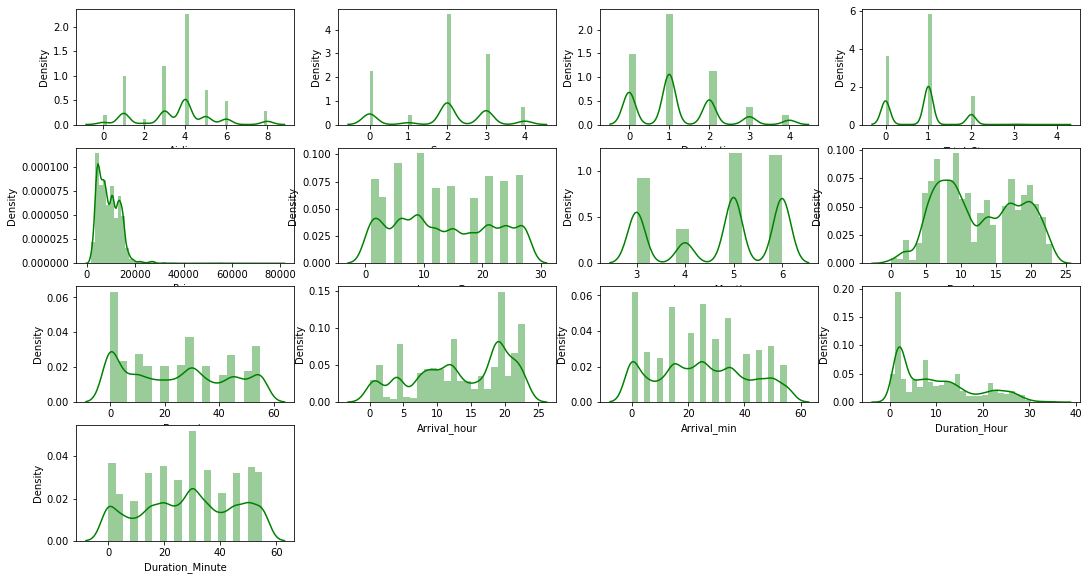

In [44]:
plt.figure(figsize=(18,20))
for i in enumerate(new_train_data):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(new_train_data[i[1]],color='g')

We can see skewness in dataset.Lets remove it.

In [45]:
new_train_data.skew()

Airline            0.132806
Source            -0.423176
Destination        0.843413
Total_Stops        0.298537
Price              1.824353
Journey_Day        0.116752
Journey_Month     -0.395360
Dep_hour           0.103647
Dep_min            0.164757
Arrival_hour      -0.361408
Arrival_min        0.107806
Duration_Hour      0.761330
Duration_Minute   -0.097193
dtype: float64

In [46]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=new_train_data.drop(['Price'], axis=1)
y=new_train_data['Price']
df2=pd.DataFrame(x,columns=x.columns)

x=power_transform(x, method='yeo-johnson')

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.31721027, -1.59709257,  0.90598456, ..., -0.77482005,
        -1.17262323,  1.19744135],
       [-1.49424139,  0.89976007, -1.38837179, ..., -0.43168285,
        -0.04750131, -0.10612402],
       [ 0.23850151, -0.01193924,  0.03046954, ...,  0.15739271,
         1.09759242, -1.88004089],
       ...,
       [ 0.23850151, -1.59709257,  0.90598456, ..., -0.12474794,
        -0.8528882 , -1.88004089],
       [ 2.33649081, -1.59709257,  0.90598456, ..., -0.77482005,
        -1.17262323,  0.69975373],
       [-1.49424139, -0.01193924,  0.03046954, ..., -0.43168285,
         0.09443796, -0.39755683]])

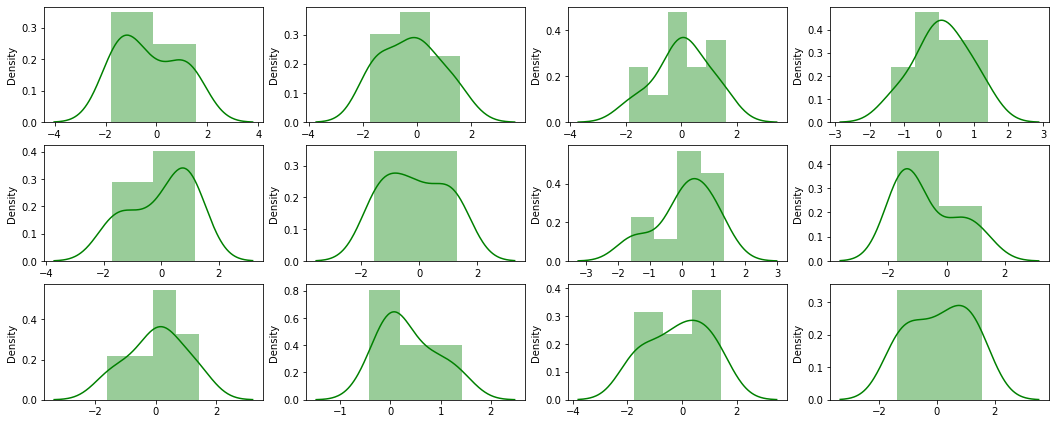

In [48]:
plt.figure(figsize=(18,20))
for i in enumerate(pd.DataFrame(x)):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(pd.DataFrame(x[i[1]]),color='g')

Now the skewness is removed.

# VIF calculation

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(pd.DataFrame(x).values,i) for i in range(pd.DataFrame(x).shape[1])]
    vif["features"]=df2.columns
    print(vif)
    
vif_calc()  

    VIF Factor         features
0     1.048018          Airline
1     1.437312           Source
2     1.696486      Destination
3     3.712004      Total_Stops
4     1.003263      Journey_Day
5     1.053264    Journey_Month
6     1.034539         Dep_hour
7     1.029074          Dep_min
8     1.060230     Arrival_hour
9     1.113854      Arrival_min
10    3.901202    Duration_Hour
11    1.099632  Duration_Minute


We can see all values are less than 10, so there is no multicollinearity. We can proceed with the model.

# Finding the best random state

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

maxRS=0
maxAccu=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.5308000091781137 on Random State 255


# Different Models:

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=255)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()



model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model]

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print("cross Validation score of ",m ," is ",cross_val_score(m,x,y,cv=5).mean())
    print('\n\n')

mean_absolute_error of  LinearRegression() model 2249.533162288602
mean_square_error of LinearRegression() model 8479434.527283695
R2 Score of LinearRegression() model 54.175146702287826
cross Validation score of  LinearRegression()  is  0.4696396582251599



mean_absolute_error of  Ridge() model 2249.500732749883
mean_square_error of Ridge() model 8479354.02170781
R2 Score of Ridge() model 54.17558177330496
cross Validation score of  Ridge()  is  0.4696398454222882



mean_absolute_error of  Lasso() model 2249.2460777382976
mean_square_error of Lasso() model 8478263.892166432
R2 Score of Lasso() model 54.181473089069996
cross Validation score of  Lasso()  is  0.4696452152313236



mean_absolute_error of  DecisionTreeRegressor() model 1318.1325957313245
mean_square_error of DecisionTreeRegressor() model 5777764.513111268
R2 Score of DecisionTreeRegressor() model 68.77560521870481
cross Validation score of  DecisionTreeRegressor()  is  0.6562072613503404



mean_absolute_error of  SVR()

We can see Random Forest Regressor is working better than others.

# Hyperparameter Tuning:

In [53]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()
param={'n_estimators':[10,30,50,70,100],'criterion':['mse','mae'],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}
grid=GridSearchCV(estimator=model,param_grid=param,cv=5)
grid.fit(x_train,y_train)

print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})
0.7920033505839004
mse
{'criterion': 'mse', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [54]:
RF=RandomForestRegressor(criterion ='mae', min_samples_leaf=2 , min_samples_split=4 , n_estimators=100 )
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
R2_Score=r2_score(y_test,predRF)
print("R2 score for the Best Model is:", R2_Score)

R2 score for the Best Model is: 0.8466890048910916


# Saving the best Model:

In [56]:
#saved model using joblib library
import joblib
filename = "Flight"
joblib.dump(RF, filename)

['Flight']

In [58]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predRF},index=range(len(a)))
df_com.sample(5)

,original,Predicted
229,12373,12367.100
1759,13029,14232.090
1511,4667,4708.270
302,10844,11777.645
3,6015,5483.235


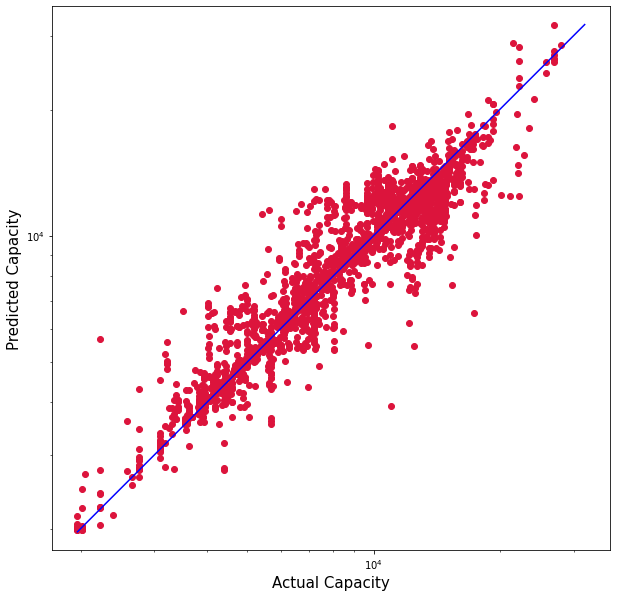

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(a, predRF, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predRF), max(a))
p2 = min(min(predRF), min(a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Capacity', fontsize=15)
plt.ylabel('Predicted Capacity', fontsize=15)
plt.axis('equal')
plt.show()

# Checking Test Data:

In [64]:
test_data=pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [65]:
test_data.shape

(2671, 10)

In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [67]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There ia no null values in the test dataset.

<AxesSubplot:>

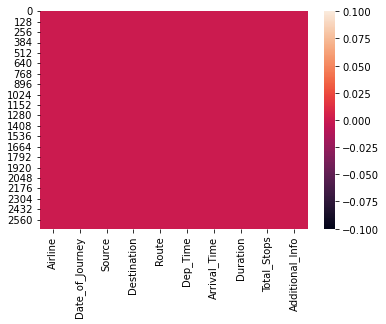

In [69]:
sns.heatmap(test_data.isnull())

In [70]:
test_data["Journey_Day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day

test_data["Journey_Month"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month

# dropping Date_of_Journey column

test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [71]:
# Similar to Date_of_Journey we can extract values from Dep_Time/Arrival_Time

# Extracting Hours
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour

# Extracting Minutes
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

# dropping Dep_Time
test_data.drop(["Dep_Time"], axis = 1, inplace = True)


# Extracting Hours
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour

# Extracting Minutes
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute

# dropping Arrival_Time
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [72]:
# PreProcessing of Duration Columns and Derive New Two Columns (Duration_Hours,Duration_Min)
test_data['Duration'].unique()

# Function for impute duration values like 0h or 0m
def impute_Duration(duration):
    x = duration.split()
    
    if len(x) != 2:
        if 'h' in x[0]:
            return x[0] + ' 0m'
        else:
            return '0h ' + x[0]
        
    else:
        return duration

# Call Function
test_data['Duration'] = test_data['Duration'].apply(impute_Duration)

In [73]:
# Make New Two Columns of Duration
test_data['Duration_Hour'] = test_data['Duration'].apply(lambda x:int(x.split('h')[0]))
test_data['Duration_Minute'] = test_data['Duration'].apply(lambda x:x.split('m')[0].split()[1])

test_data.drop(["Duration"], axis = 1, inplace = True)

In [74]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
test_data["Airline"] = test_data["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
test_data["Airline"] = test_data["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
test_data["Airline"] = test_data["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
test_data["Destination"] = test_data["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_data["Additional_Info"] = test_data["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
test_data["Additional_Info"] = test_data["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [75]:
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Here Values are assigned with corresponding keys
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [76]:
#encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data['Airline']=le.fit_transform(test_data['Airline'])
test_data['Source']=le.fit_transform(test_data['Source'])
test_data['Destination']=le.fit_transform(test_data['Destination'])
test_data['Total_Stops']=le.fit_transform(test_data['Total_Stops'])

In [77]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hour,Duration_Minute
0,4,2,1,1,6,6,17,30,4,25,10,55
1,3,3,0,1,12,5,6,20,10,20,4,0
2,4,2,1,1,21,5,19,15,19,0,23,45
3,5,2,1,1,21,5,8,0,21,0,13,0
4,0,0,2,0,24,6,23,55,2,45,2,50


In [79]:
# Loading the saved model
flight_test=joblib.load('Flight')

In [80]:
flight_test.predict(test_data)

array([15928.72 , 15929.925, 15848.245, ..., 15928.72 , 15012.52 ,
       15928.72 ])